In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from stats import dm_test

In [2]:
params = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/PARAMS_NORM_FINAL.csv')
params_t = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/PARAMS_STUD_FINAL.csv')

In [3]:
params.set_index(pd.to_datetime(params.iloc[:, 0]), inplace = True)
params = params.iloc[:, 1:]
params_t.set_index(pd.to_datetime(params_t.iloc[:, 0]), inplace = True)
params_t = params_t.iloc[:, 1:]

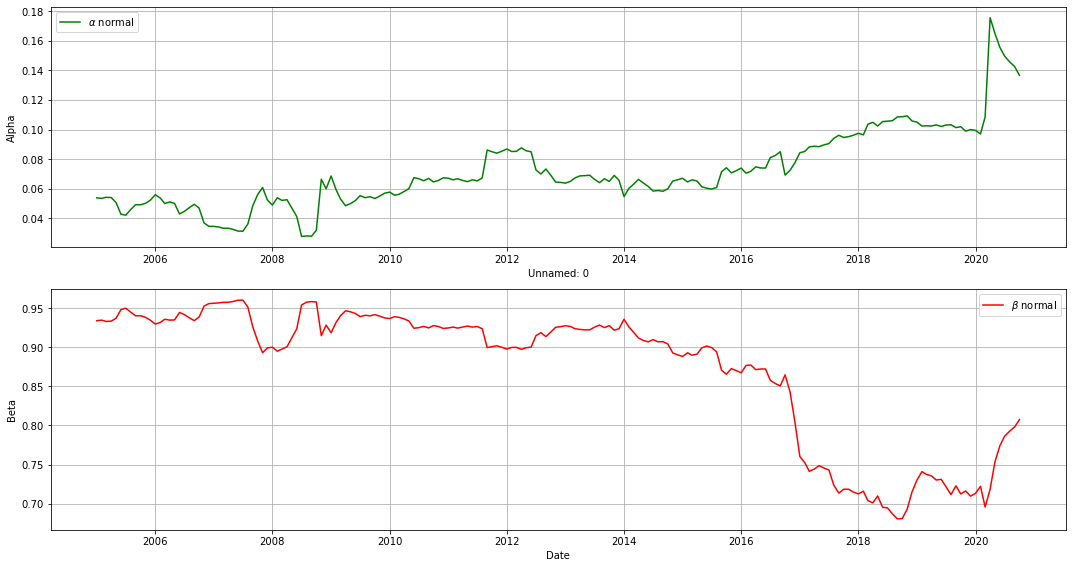

In [4]:
fig, ax = plt.subplots(2, 1, figsize = (15,8))
sns.lineplot(pd.to_datetime(params.index), params.Alpha, label = r'$\alpha$ normal', color = 'g', ax = ax[0])
ax[0].grid(True)
sns.lineplot(pd.to_datetime(params.index), params.Beta, label = r'$\beta$ normal', color = 'r', ax = ax[1])
ax[1].grid(True)
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

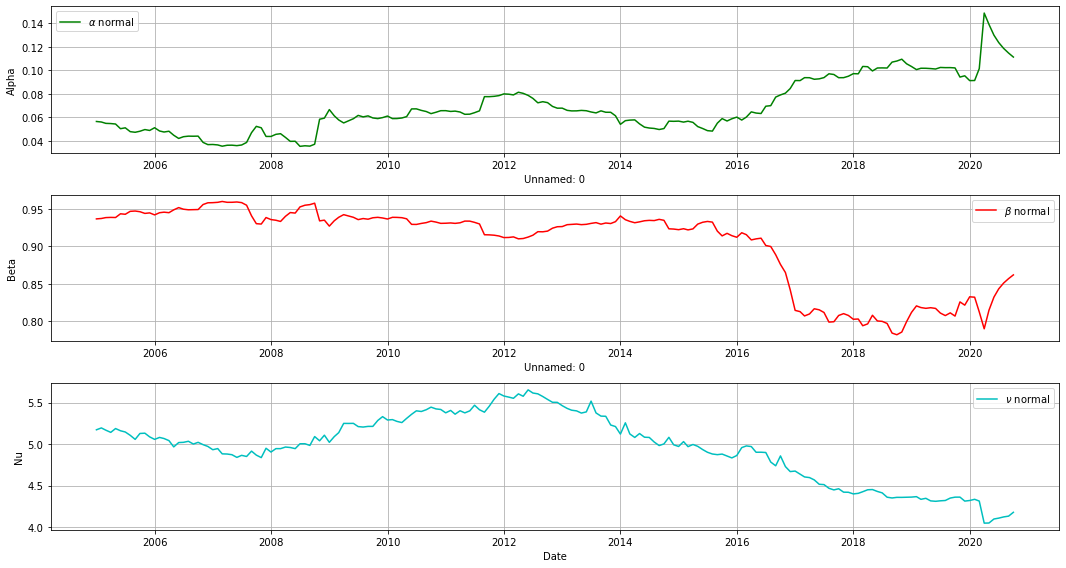

In [5]:
fig, ax = plt.subplots(3, 1, figsize = (15,8))
sns.lineplot(pd.to_datetime(params.index), params_t.Alpha, label = r'$\alpha$ normal', color = 'g', ax = ax[0])
ax[0].grid(True)
sns.lineplot(pd.to_datetime(params.index), params_t.Beta, label = r'$\beta$ normal', color = 'r', ax = ax[1])
ax[1].grid(True)
sns.lineplot(pd.to_datetime(params.index), params_t.Nu, label = r'$\nu$ normal', color = 'c', ax = ax[2])
ax[2].grid(True)
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

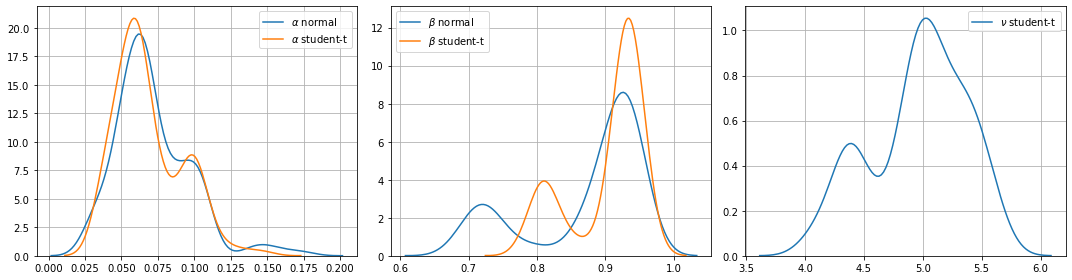

In [6]:
fig, ax = plt.subplots(1, 3, figsize = (15,4))

sns.kdeplot(params.Alpha, ax = ax[0], label = r'$\alpha$ normal')
sns.kdeplot(params_t.Alpha, ax = ax[0], label = r'$\alpha$ student-t')
ax[0].grid(0.2)

sns.kdeplot(params.Beta, ax = ax[1], label = r'$\beta$ normal')
sns.kdeplot(params_t.Beta, ax = ax[1], label = r'$\beta$ student-t')
ax[1].grid(0.2)

sns.kdeplot(params_t.Nu, ax = ax[2], label = r'$\nu$ student-t')
ax[2].grid(0.2)

plt.tight_layout()
plt.show()

In [7]:
params_csa = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_CSA/PARAMS_NORM_FINAL.csv')

In [9]:
params_csa.set_index(pd.to_datetime(params_csa.iloc[:, 0]), inplace = True)
params_csa = params_csa.iloc[:, 1:]

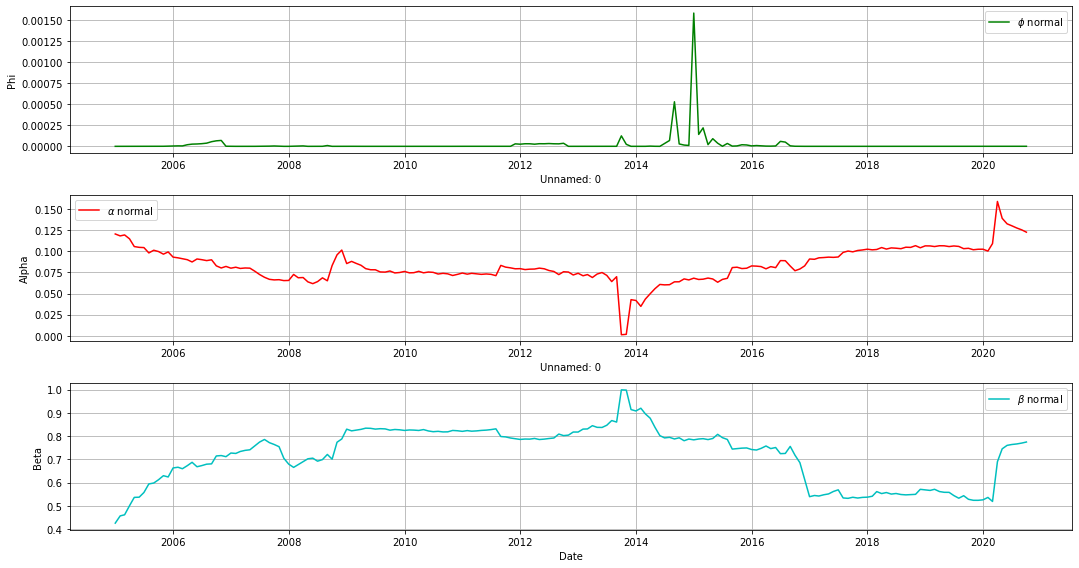

In [10]:
fig, ax = plt.subplots(3, 1, figsize = (15,8))
sns.lineplot(pd.to_datetime(params_csa.index), params_csa.Phi, label = r'$\phi$ normal', color = 'g', ax = ax[0])
ax[0].grid(True)
sns.lineplot(pd.to_datetime(params_csa.index), params_csa.Alpha, label = r'$\alpha$ normal', color = 'r', ax = ax[1])
ax[1].grid(True)
sns.lineplot(pd.to_datetime(params_csa.index), params_csa.Beta, label = r'$\beta$ normal', color = 'c', ax = ax[2])
ax[2].grid(True)
plt.legend(loc = 'best')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

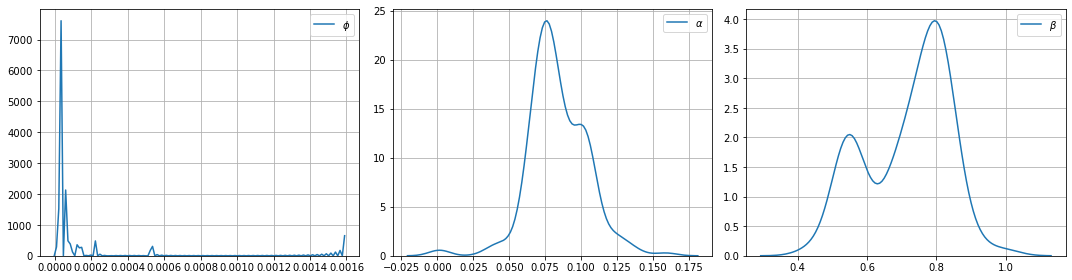

In [11]:
fig, ax = plt.subplots(1, 3, figsize = (15,4))

sns.kdeplot(params_csa.Phi, ax = ax[0], label = r'$\phi$')
ax[0].grid(0.2)

sns.kdeplot(params_csa.Alpha, ax = ax[1], label = r'$\alpha$')
ax[1].grid(0.2)

sns.kdeplot(params_csa.Beta, ax = ax[2], label = r'$\beta$')
ax[2].grid(0.2)

plt.tight_layout()
plt.show()

In [19]:
actual = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/MONTHLY_VOLATILITY_CALC.csv')
actual = actual.set_index(actual.iloc[:, 0])
actual = actual.iloc[:, 1:]

In [20]:
daily_act = actual.iloc[:-1, :] / np.sqrt(22)
monthly_avg = daily_act.mean(axis = 1)

In [18]:
pred1 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/forecast_norm_dist.csv')
pred1 = pred1.T
pred1.columns = pred1.iloc[0, :].values
pred1 = pred1.iloc[1:, :]
#pred1_avg = pred1.mean(axis = 1)
pred1_avg = np.nanmean(pred1.values, axis = 1)

In [17]:
pred2 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/forecast_t_dist.csv')
pred2 = pred2.T
pred2.columns = pred2.iloc[0, :].values
pred2 = pred2.iloc[1:, :]
#pred2_avg = pred2.mean(axis = 1)
pred2_avg = np.nanmean(pred2.values, axis = 1)

In [13]:
pgcsa = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_CSA/FORECAST_NORM_FINAL.csv')
pgcsa.set_index(pd.to_datetime(pgcsa.iloc[:, 0]), inplace = True)
pgcsa = pgcsa.iloc[:, 1:]
pgcsa_avg = np.nanmean(pgcsa.values, axis = 1)

## DM test with MSE criterion:

In [21]:
dm_test(monthly_avg.values, pred1_avg, pred2_avg, h = 1, degree = 0)

(2.5848142005183714, 0.010496756455495141)

## DM test with QLIKE criterion:

In [22]:
dm_test(monthly_avg.values, pred1_avg, pred2_avg, h = 1, degree = -2)

(-2.917818957162368, 0.003952378271464045)

In [27]:
pd.to_datetime(monthly_avg.index).shape

(190,)

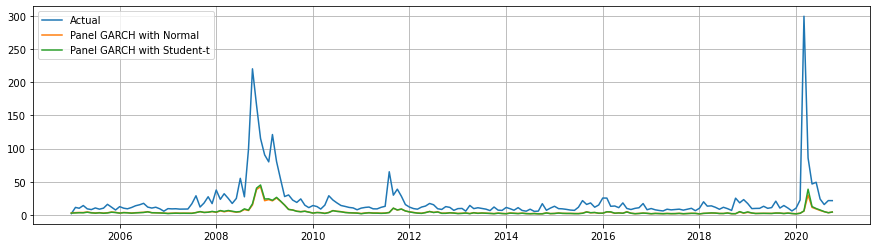

In [28]:
plt.figure(figsize = (15, 4))
plt.plot(pd.to_datetime(monthly_avg.index), monthly_avg, label = 'Actual')
plt.plot(pd.to_datetime(monthly_avg.index), pred1_avg, label = 'Panel GARCH with Normal')
plt.plot(pd.to_datetime(monthly_avg.index), pred2_avg, label = 'Panel GARCH with Student-t')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

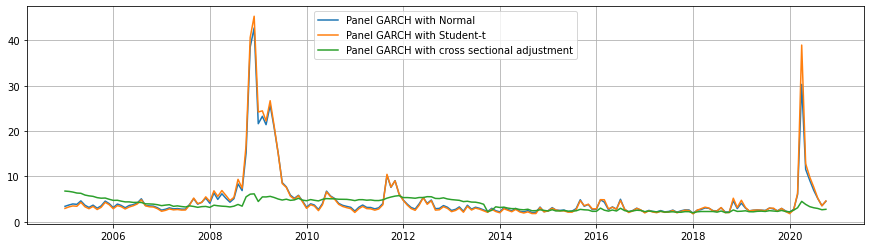

In [30]:
plt.figure(figsize = (15, 4))
plt.plot(pd.to_datetime(monthly_avg.index), pred1_avg, label = 'Panel GARCH with Normal')
plt.plot(pd.to_datetime(monthly_avg.index), pred2_avg, label = 'Panel GARCH with Student-t')
plt.plot(pd.to_datetime(monthly_avg.index), pgcsa_avg, label = 'Panel GARCH with cross sectional adjustment')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

## Panel GARCH-MIDAS

In [31]:
midas_pars = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/params_midas.csv')
norm_pars = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/params_norm.csv')
stud_pars = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/params_stud.csv')

In [32]:
midas_pars.set_index(pd.to_datetime(midas_pars.iloc[:, 0]), inplace = True)
midas_pars = midas_pars.iloc[:, 1:]
norm_pars.set_index(pd.to_datetime(norm_pars.iloc[:, 0]), inplace = True)
norm_pars = norm_pars.iloc[:, 1:]
stud_pars.set_index(pd.to_datetime(stud_pars.iloc[:, 0]), inplace = True)
stud_pars = stud_pars.iloc[:, 1:]

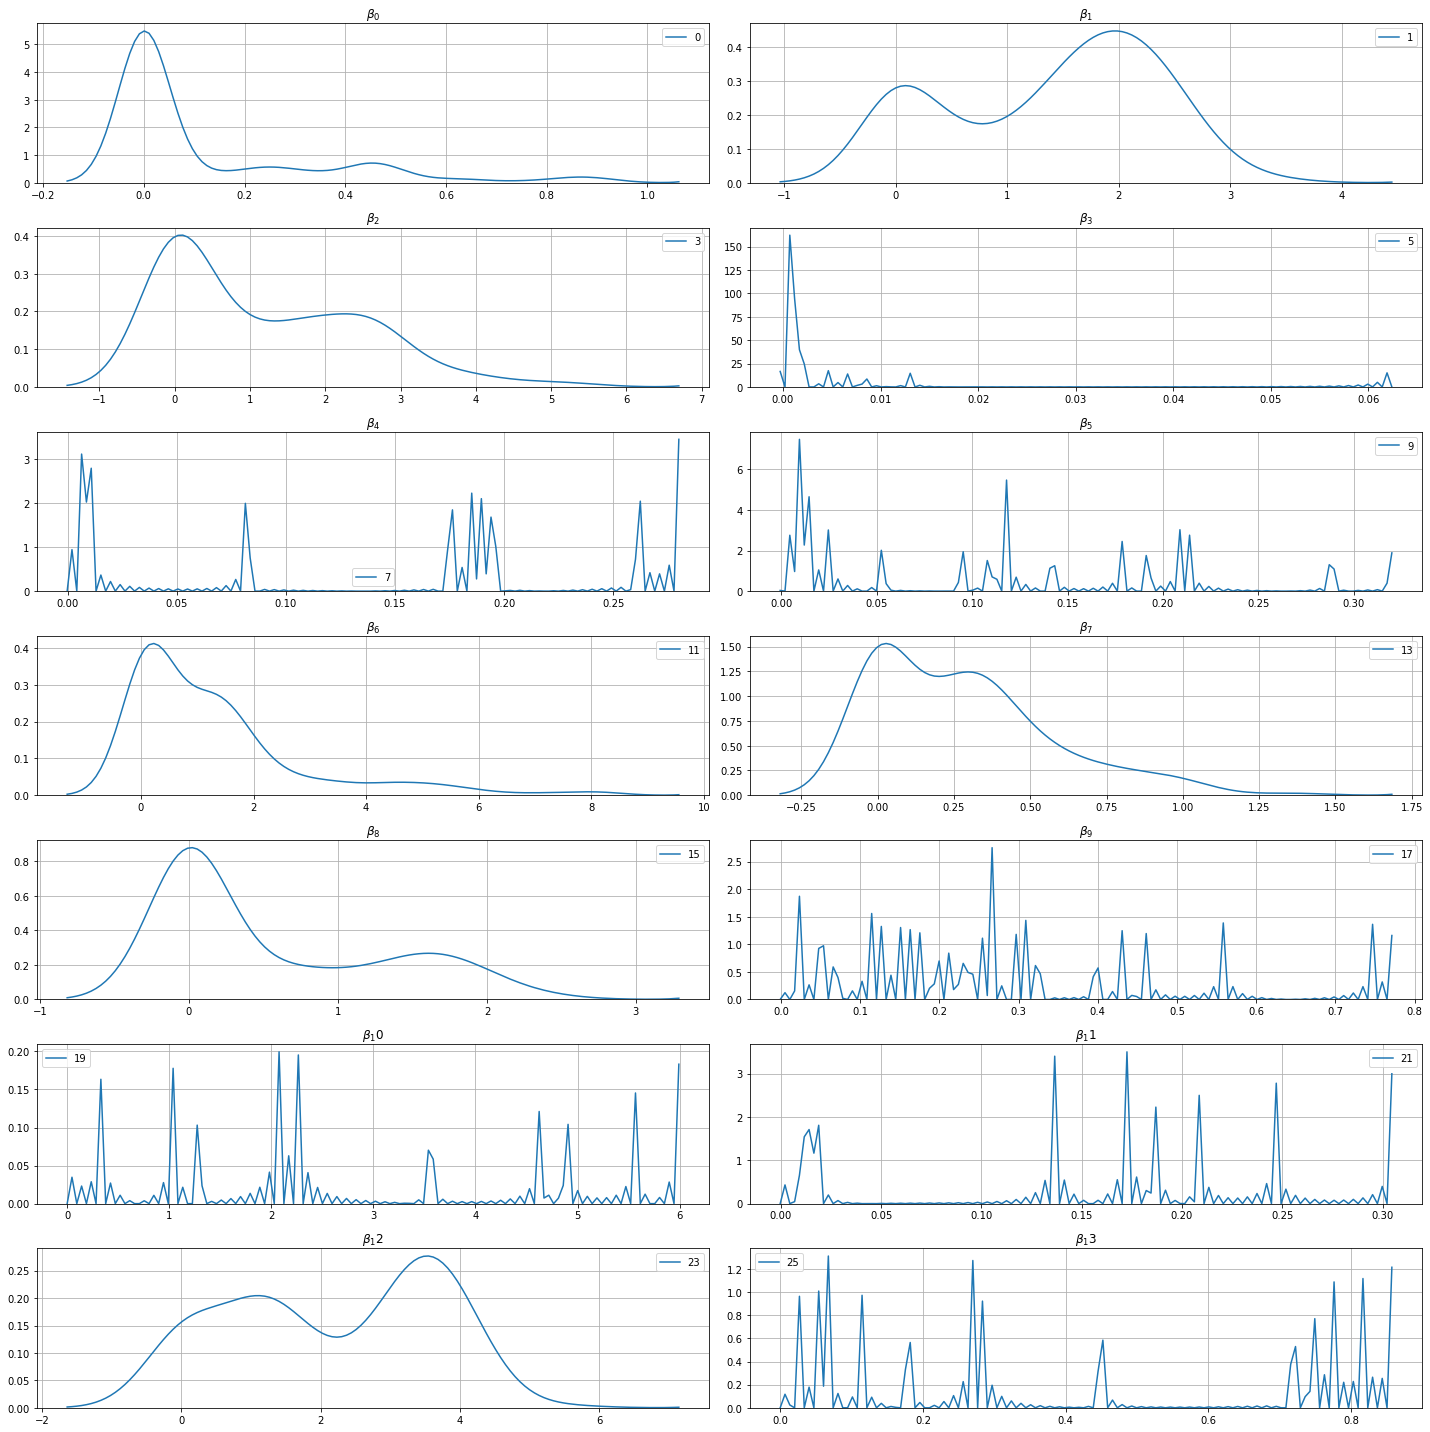

In [26]:
fig, ax = plt.subplots(7, 2, figsize = (20,20))


sns.kdeplot(midas_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\beta_0$')

sns.kdeplot(midas_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta_1$')

sns.kdeplot(midas_pars.iloc[:, 3], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\beta_2$')

sns.kdeplot(midas_pars.iloc[:, 5], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta_3$')

sns.kdeplot(midas_pars.iloc[:, 7], ax = ax[2][0])
ax[2][0].grid(0.2)
ax[2][0].set_title(r'$\beta_4$')

sns.kdeplot(midas_pars.iloc[:, 9], ax = ax[2][1])
ax[2][1].grid(0.2)
ax[2][1].set_title(r'$\beta_5$')

sns.kdeplot(midas_pars.iloc[:, 11], ax = ax[3][0])
ax[3][0].grid(0.2)
ax[3][0].set_title(r'$\beta_6$')

sns.kdeplot(midas_pars.iloc[:, 13], ax = ax[3][1])
ax[3][1].grid(0.2)
ax[3][1].set_title(r'$\beta_7$')

sns.kdeplot(midas_pars.iloc[:, 15], ax = ax[4][0])
ax[4][0].grid(0.2)
ax[4][0].set_title(r'$\beta_8$')

sns.kdeplot(midas_pars.iloc[:, 17], ax = ax[4][1])
ax[4][1].grid(0.2)
ax[4][1].set_title(r'$\beta_9$')

sns.kdeplot(midas_pars.iloc[:, 19], ax = ax[5][0])
ax[5][0].grid(0.2)
ax[5][0].set_title(r'$\beta_10$')

sns.kdeplot(midas_pars.iloc[:, 21], ax = ax[5][1])
ax[5][1].grid(0.2)
ax[5][1].set_title(r'$\beta_11$')

sns.kdeplot(midas_pars.iloc[:, 23], ax = ax[6][0])
ax[6][0].grid(0.2)
ax[6][0].set_title(r'$\beta_12$')

sns.kdeplot(midas_pars.iloc[:, 25], ax = ax[6][1])
ax[6][1].grid(0.2)
ax[6][1].set_title(r'$\beta_13$')

plt.tight_layout()
plt.show()

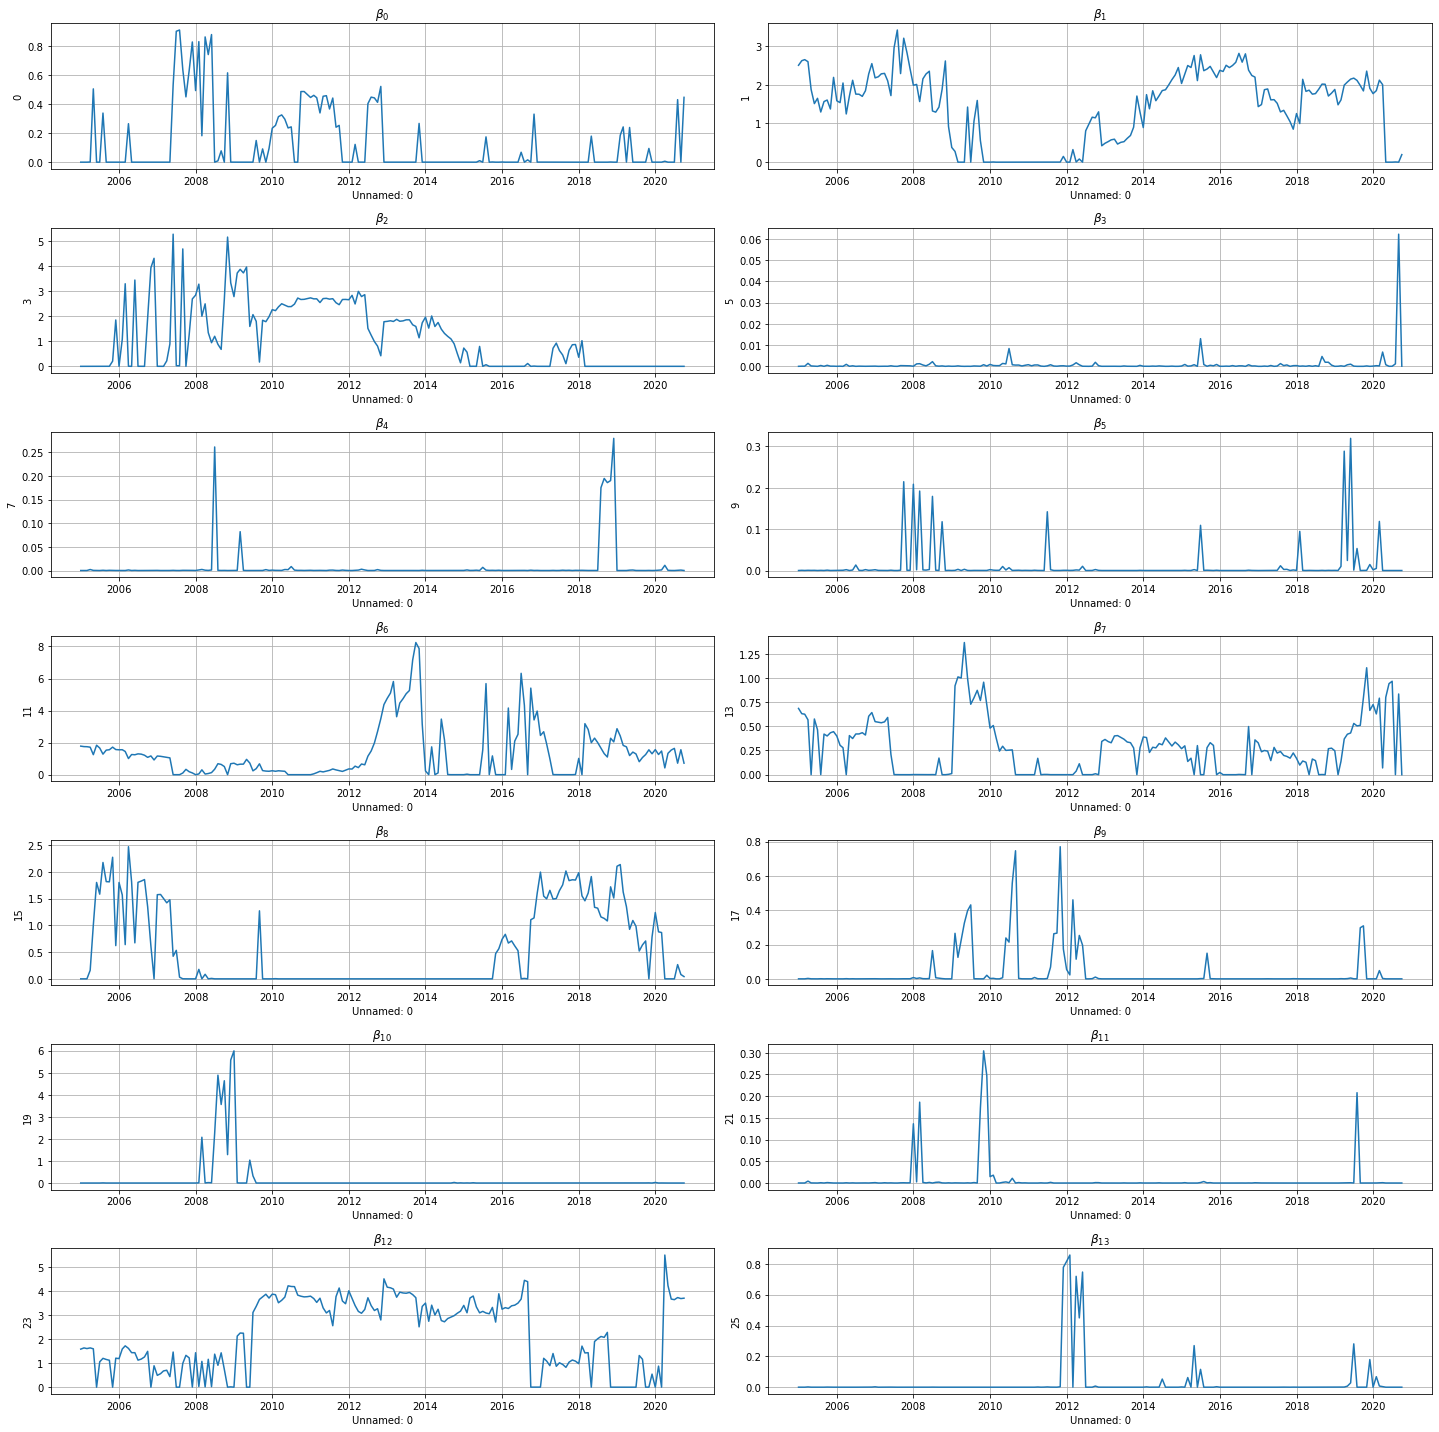

In [29]:
fig, ax = plt.subplots(7, 2, figsize = (20,20))


sns.lineplot(midas_pars.index, midas_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\beta_0$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta_1$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 3], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\beta_2$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 5], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta_3$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 7], ax = ax[2][0])
ax[2][0].grid(0.2)
ax[2][0].set_title(r'$\beta_4$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 9], ax = ax[2][1])
ax[2][1].grid(0.2)
ax[2][1].set_title(r'$\beta_5$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 11], ax = ax[3][0])
ax[3][0].grid(0.2)
ax[3][0].set_title(r'$\beta_6$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 13], ax = ax[3][1])
ax[3][1].grid(0.2)
ax[3][1].set_title(r'$\beta_7$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 15], ax = ax[4][0])
ax[4][0].grid(0.2)
ax[4][0].set_title(r'$\beta_8$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 17], ax = ax[4][1])
ax[4][1].grid(0.2)
ax[4][1].set_title(r'$\beta_9$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 19], ax = ax[5][0])
ax[5][0].grid(0.2)
ax[5][0].set_title(r'$\beta_{10}$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 21], ax = ax[5][1])
ax[5][1].grid(0.2)
ax[5][1].set_title(r'$\beta_{11}$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 23], ax = ax[6][0])
ax[6][0].grid(0.2)
ax[6][0].set_title(r'$\beta_{12}$')

sns.lineplot(midas_pars.index, midas_pars.iloc[:, 25], ax = ax[6][1])
ax[6][1].grid(0.2)
ax[6][1].set_title(r'$\beta_{13}$')

plt.tight_layout()
plt.show()

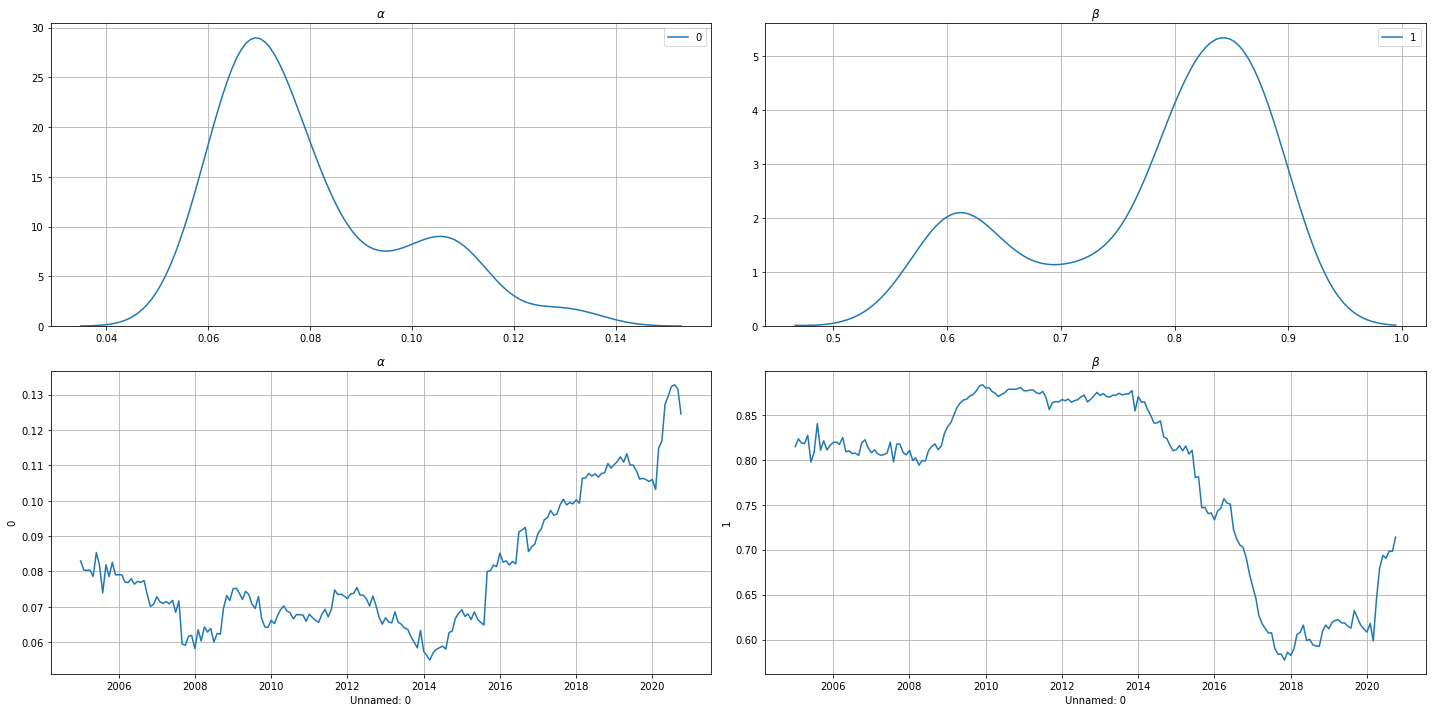

In [31]:
fig, ax = plt.subplots(2, 2, figsize = (20,10))


sns.kdeplot(norm_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\alpha$')

sns.kdeplot(norm_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta$')

sns.lineplot(norm_pars.index, norm_pars.iloc[:, 0], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\alpha$')

sns.lineplot(norm_pars.index, norm_pars.iloc[:, 1], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta$')

plt.tight_layout()
plt.show()

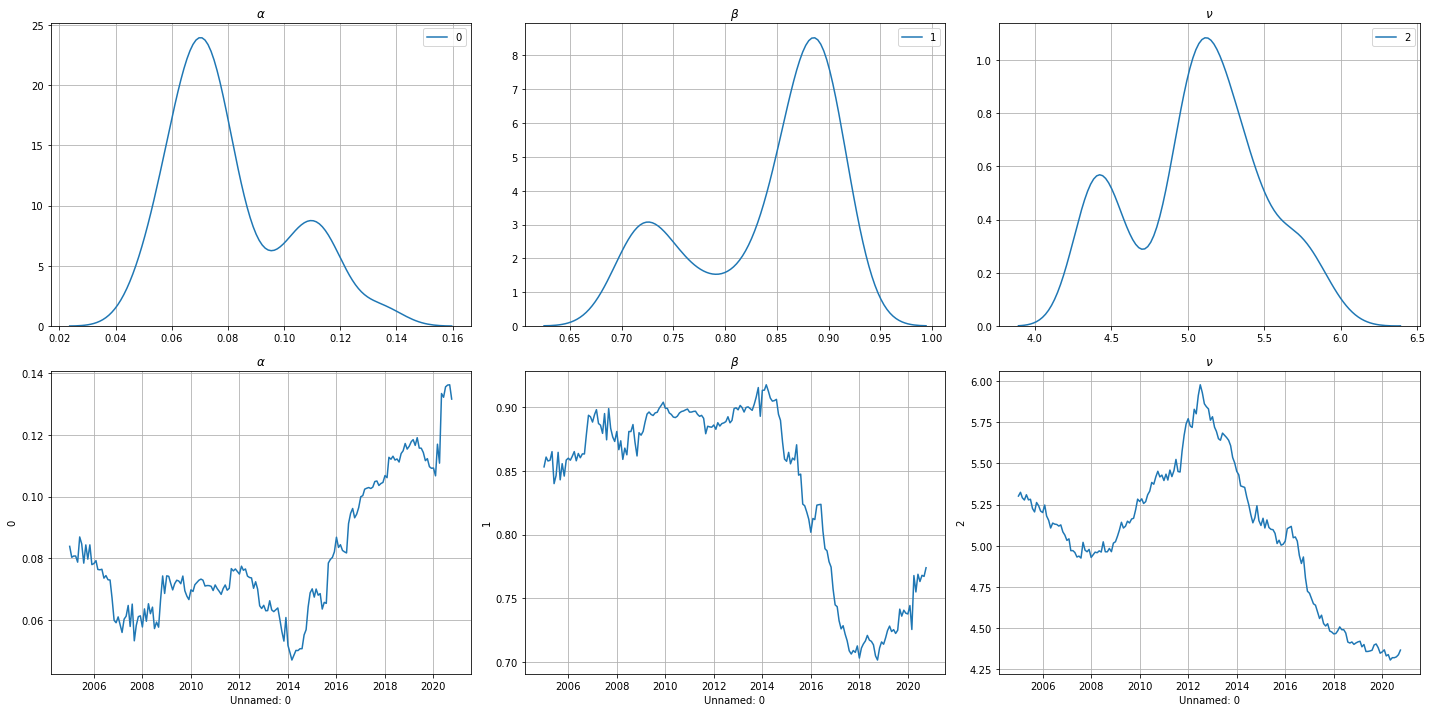

In [102]:
fig, ax = plt.subplots(2, 3, figsize = (20,10))


sns.kdeplot(stud_pars.iloc[:, 0], ax = ax[0][0])
ax[0][0].grid(0.2)
ax[0][0].set_title(r'$\alpha$')

sns.kdeplot(stud_pars.iloc[:, 1], ax = ax[0][1])
ax[0][1].grid(0.2)
ax[0][1].set_title(r'$\beta$')

sns.kdeplot(stud_pars.iloc[:, 2], ax = ax[0][2])
ax[0][2].grid(0.2)
ax[0][2].set_title(r'$\nu$')

sns.lineplot(stud_pars.index, stud_pars.iloc[:, 0], ax = ax[1][0])
ax[1][0].grid(0.2)
ax[1][0].set_title(r'$\alpha$')

sns.lineplot(stud_pars.index, stud_pars.iloc[:, 1], ax = ax[1][1])
ax[1][1].grid(0.2)
ax[1][1].set_title(r'$\beta$')

sns.lineplot(stud_pars.index, stud_pars.iloc[:, 2], ax = ax[1][2])
ax[1][2].grid(0.2)
ax[1][2].set_title(r'$\nu$')

plt.tight_layout()
plt.show()

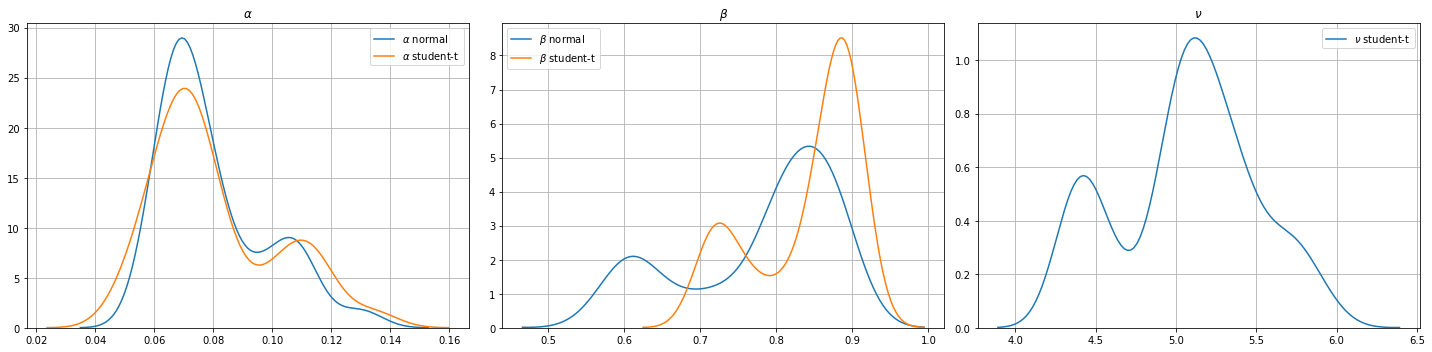

In [104]:
fig, ax = plt.subplots(1, 3, figsize = (20,5))

sns.kdeplot(norm_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ normal')
sns.kdeplot(stud_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ student-t')
ax[0].grid(0.2)
ax[0].set_title(r'$\alpha$')

sns.kdeplot(norm_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ normal')
sns.kdeplot(stud_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ student-t')
ax[1].grid(0.2)
ax[1].set_title(r'$\beta$')

sns.kdeplot(stud_pars.iloc[:, 2], ax = ax[2], label = r'$\nu$ student-t')
ax[2].grid(0.2)
ax[2].set_title(r'$\nu$')

plt.tight_layout()
plt.show()

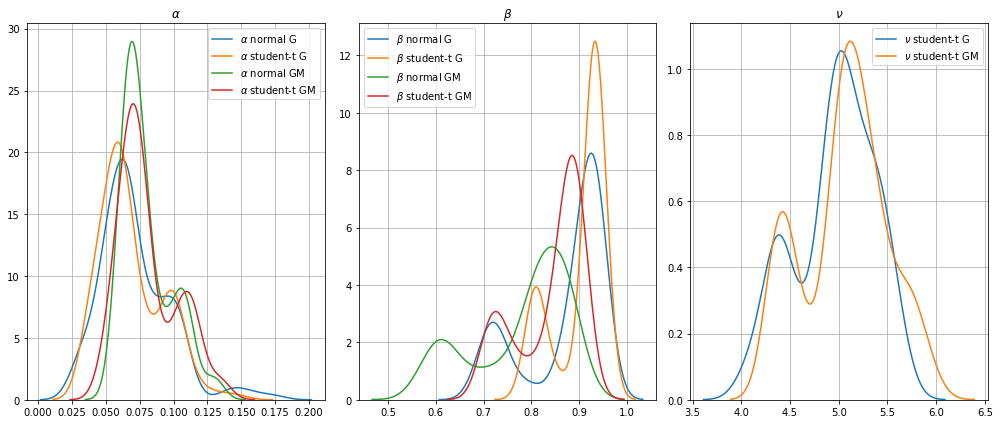

In [112]:
fig, ax = plt.subplots(1, 3, figsize = (14,6))

sns.kdeplot(params.Alpha, ax = ax[0], label = r'$\alpha$ normal G')
sns.kdeplot(params_t.Alpha, ax = ax[0], label = r'$\alpha$ student-t G')
sns.kdeplot(norm_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ normal GM')
sns.kdeplot(stud_pars.iloc[:, 0], ax = ax[0], label = r'$\alpha$ student-t GM')
ax[0].grid(0.2)
ax[0].set_title(r'$\alpha$')

sns.kdeplot(params.Beta, ax = ax[1], label = r'$\beta$ normal G')
sns.kdeplot(params_t.Beta, ax = ax[1], label = r'$\beta$ student-t G')
sns.kdeplot(norm_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ normal GM')
sns.kdeplot(stud_pars.iloc[:, 1], ax = ax[1], label = r'$\beta$ student-t GM')
ax[1].grid(0.2)
ax[1].set_title(r'$\beta$')

sns.kdeplot(params_t.Nu, ax = ax[2], label = r'$\nu$ student-t G')
sns.kdeplot(stud_pars.iloc[:, 2], ax = ax[2], label = r'$\nu$ student-t GM')
ax[2].grid(0.2)
ax[2].set_title(r'$\nu$')

plt.tight_layout()
plt.show()

In [33]:
gm_norm = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/forecast_norm.csv')
gm_stud = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH_MIDAS/Concated/forecast_stud.csv')

In [34]:
gm_norm.set_index(pd.to_datetime(gm_norm.iloc[:, 0]), inplace = True)
gm_norm = gm_norm.iloc[:, 1:]
gm_stud.set_index(pd.to_datetime(gm_stud.iloc[:, 0]), inplace = True)
gm_stud = gm_stud.iloc[:, 1:]

In [36]:
gm_norm_avg = np.nanmean(gm_norm.values, axis = 1)
gm_stud_avg = np.nanmean(gm_stud.values, axis = 1)

In [37]:
actual = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/MONTHLY_VOLATILITY_CALC.csv')
actual = actual.set_index(actual.iloc[:, 0])
actual = actual.iloc[:, 1:]
actual.pop('AMCR')

Unnamed: 0
2005-01     0.000000
2005-02     0.000000
2005-03     0.000000
2005-04     0.000000
2005-05     0.000000
             ...    
2020-07    36.358727
2020-08    39.977471
2020-09    65.923220
2020-10    33.613098
2020-11     0.000000
Name: AMCR, Length: 191, dtype: float64

In [38]:
daily_act = actual.iloc[:-1, :] / np.sqrt(22)
monthly_avg = daily_act.mean(axis = 1)

In [39]:
pred1 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/forecast_norm_dist.csv')
pred1 = pred1.T
pred1.columns = pred1.iloc[0, :].values
pred1 = pred1.iloc[1:, :]
pred1.pop('AMCR')
pred1_avg = np.nanmean(pred1.values, axis = 1)

In [40]:
pred2 = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_GARCH/forecast_t_dist.csv')
pred2 = pred2.T
pred2.columns = pred2.iloc[0, :].values
pred2 = pred2.iloc[1:, :]
pred2.pop('AMCR')
pred2_avg = np.nanmean(pred2.values, axis = 1)

In [52]:
ewma = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/Panel_EWMA/forecast.csv')
ewma.set_index(ewma.iloc[:, 0], inplace = True)
ewma = ewma.iloc[:, 1:]
ewma.columns = pd.to_datetime(ewma.columns)
for i in range(ewma.shape[1]):
    ewma.iloc[:, i][ewma.iloc[:, i] == 1.00] = np.nan
ewma = ewma.T
ewma_avg = np.nanmean(ewma.values, axis = 1)

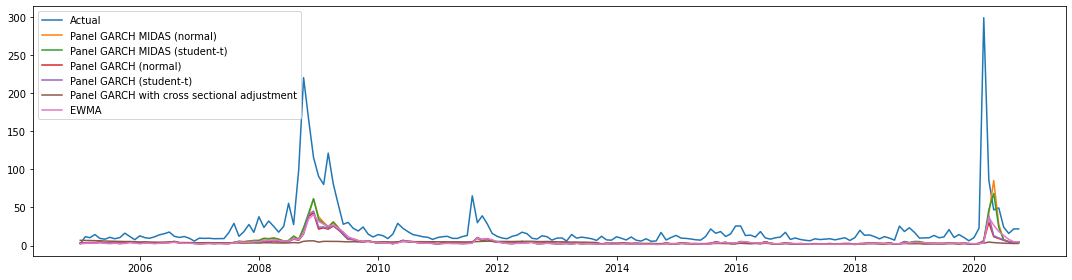

In [53]:
plt.figure(figsize = (15, 4))
plt.plot(gm_norm.index, monthly_avg, label = 'Actual')
plt.plot(gm_norm.index, gm_norm_avg, label = 'Panel GARCH MIDAS (normal)')
plt.plot(gm_norm.index, gm_stud_avg, label = 'Panel GARCH MIDAS (student-t)')
plt.plot(gm_norm.index, pred1_avg, label = 'Panel GARCH (normal)')
plt.plot(gm_norm.index, pred2_avg, label = 'Panel GARCH (student-t)')
plt.plot(gm_norm.index, pgcsa_avg, label = 'Panel GARCH with cross sectional adjustment')
plt.plot(gm_norm.index, ewma_avg, label = 'EWMA')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

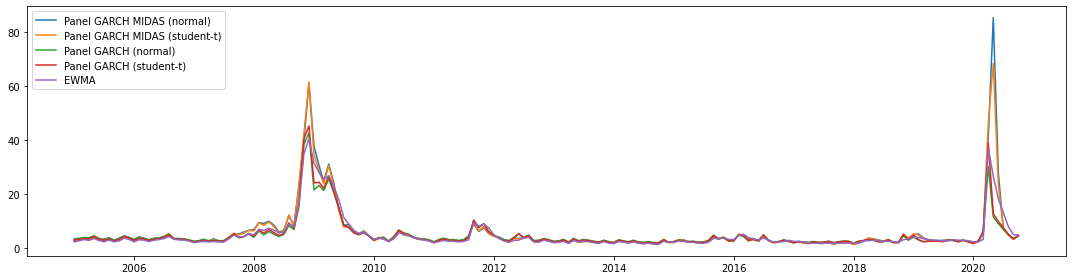

In [54]:
plt.figure(figsize = (15, 4))
plt.plot(gm_norm.index ,gm_norm_avg, label = 'Panel GARCH MIDAS (normal)')
plt.plot(gm_norm.index, gm_stud_avg, label = 'Panel GARCH MIDAS (student-t)')
plt.plot(gm_norm.index, pred1_avg, label = 'Panel GARCH (normal)')
plt.plot(gm_norm.index, pred2_avg, label = 'Panel GARCH (student-t)')
plt.plot(gm_norm.index, ewma_avg, label = 'EWMA')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Diebold-Mariano Test with MSE:

### Panel GARCH (normal) vs Panel GARCH (student-t):

In [55]:
dm_test(monthly_avg.values, pred1_avg, pred2_avg, h = 1, degree = 0)

(2.5850679266860364, 0.010489304236481074)

### Panel GARCH (normal) vs Panel GARCH-MIDAS (normal):

In [56]:
dm_test(monthly_avg.values, pred1_avg, gm_norm_avg, h = 1, degree = 0)

(2.741883798658866, 0.0066956852594998815)

### Panel GARCH (normal) vs Panel GARCH-MIDAS (student-t):

In [57]:
dm_test(monthly_avg.values, pred1_avg, gm_stud_avg, h = 1, degree = 0)

(2.91826902792437, 0.003946926797384688)

### Panel GARCH (student-t) vs Panel GARCH-MIDAS (normal):

In [59]:
dm_test(monthly_avg.values, pred2_avg, gm_norm_avg, h = 1, degree = 0)

(2.509048606266874, 0.01294628144658466)

### Panel GARCH (student-t) vs Panel GARCH-MIDAS (student-t):

In [60]:
dm_test(monthly_avg.values, pred2_avg, gm_stud_avg, h = 1, degree = 0)

(2.855052211065072, 0.004783744553528799)

### Panel GARCH-MIDAS (normal) vs Panel GARCH-MIDAS (student-t):

In [61]:
dm_test(monthly_avg.values, gm_norm_avg, gm_stud_avg, h = 1, degree = 0)

(0.8689659546853014, 0.3859678933912931)

# Diebold-Mariano Test with QLIKE:

### Panel GARCH (normal) vs Panel GARCH (student-t):

In [62]:
dm_test(monthly_avg.values, pred1_avg, pred2_avg, h = 1, degree = -2)

(-2.9245874035357753, 0.003871118658700336)

### Panel GARCH (normal) vs Panel GARCH-MIDAS (normal):

In [63]:
dm_test(monthly_avg.values, pred1_avg, gm_norm_avg, h = 1, degree = -2)

(0.5138340494627482, 0.6079682295353301)

### Panel GARCH (normal) vs Panel GARCH-MIDAS (student-t):

In [64]:
dm_test(monthly_avg.values, pred1_avg, gm_stud_avg, h = 1, degree = -2)

(-0.32235168538391795, 0.7475425727032754)

### Panel GARCH (student-t) vs Panel GARCH-MIDAS (normal):

In [65]:
dm_test(monthly_avg.values, pred2_avg, gm_norm_avg, h = 1, degree = -2)

(1.9169085937618673, 0.056757892168208826)

### Panel GARCH (student-t) vs Panel GARCH-MIDAS (student-t):

In [67]:
dm_test(monthly_avg.values, pred2_avg, gm_stud_avg, h = 1, degree = -2)

(1.2128505924091757, 0.22670070330095954)

### Panel GARCH-MIDAS (normal) vs Panel GARCH-MIDAS (student-t):

In [68]:
dm_test(monthly_avg.values, gm_norm_avg, gm_stud_avg, h = 1, degree = -2)

(-1.7639584460454936, 0.07935457353371728)

### Panel GARCH-MIDAS (normal) vs EWMA:

In [69]:
dm_test(monthly_avg.values, gm_norm_avg, ewma_avg, h = 1, degree = -2)

(-2.273474562796671, 0.024122101602409282)

### Panel GARCH-MIDAS (student-t) vs EWMA:

In [70]:
dm_test(monthly_avg.values, gm_stud_avg, ewma_avg, h = 1, degree = -2)

(-1.858130950335895, 0.0647056404822727)